###  Created by Luis A. Sanchez-Perez (alejand@umich.edu)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [2]:
# Load dataset
dataset = datasets.load_breast_cancer()
print(dataset.feature_names, end="\n")
print(dataset.target_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']


In [3]:
# Select only two features to work with
features = [2,10]
X = dataset.data[:,features]
y = dataset.target

In [4]:
# Splitting
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [5]:
# Fitting Naive Bayes
classifier = GaussianNB()
classifier.fit(X_train,y_train)
print(classifier.sigma_,end="\n")
print(classifier.theta_)

[[5.06644163e+02 1.27200792e-01]
 [1.33019478e+02 1.36623760e-02]]
[[115.38562874   0.62384431]
 [ 77.31644788   0.29034826]]


In [6]:
# Predicting the training set results
y_pred = classifier.predict(X_train)
cm = confusion_matrix(y_train, y_pred)
print(cm)
print(accuracy_score(y_train,y_pred))

[[124  43]
 [ 10 249]]
0.8755868544600939


In [7]:
# Predicting the test set results
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test,y_pred))

[[33 12]
 [ 4 94]]
0.8881118881118881


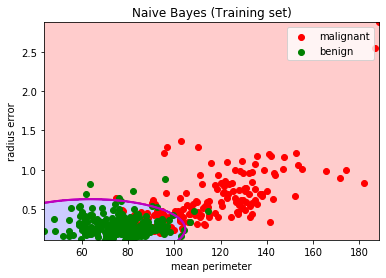

In [8]:
# Visualising the training set results
color_map = ListedColormap(('red', 'green', 'blue'))
pts = 200
x1 = np.linspace(X[:, 0].min(),X[:, 0].max(),pts)
x2 = np.linspace(X[:, 1].min(),X[:, 1].max(), pts)
X1, X2 = np.meshgrid(x1,x2)

obs = np.array([X1.ravel(), X2.ravel()]).T
y_pred = classifier.predict(obs)
plt.contourf(X1, X2, y_pred.reshape(X1.shape), alpha = 0.20, cmap = color_map)
y_prob = classifier.predict_proba(obs)[:,0]
plt.contour(X1, X2, y_prob.reshape(X1.shape), levels=[0.5], colors='m',linewidths=2)
y_prob = classifier.predict_proba(obs)[:,1]
plt.contour(X1, X2, y_prob.reshape(X1.shape), levels=[0.5], colors='m',linewidths=2)
for i, value in enumerate(np.unique(y_train)):
    plt.scatter(X_train[y_train == value, 0], X_train[y_train == value, 1],
                c = np.array(color_map(i)).reshape(1,4), label = dataset.target_names[value])
    
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
plt.title('Naive Bayes (Training set)')
plt.xlabel(dataset.feature_names[features[0]])
plt.ylabel(dataset.feature_names[features[1]])
plt.legend()
plt.show()

In [9]:
np.array(color_map(i)).reshape(1,4)

array([[0.        , 0.50196078, 0.        , 1.        ]])

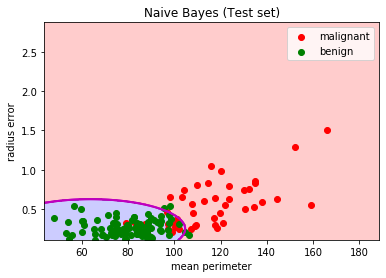

In [10]:
# Visualising the test set results
color_map = ListedColormap(('red', 'green', 'blue'))
pts = 200
x1 = np.linspace(X[:, 0].min(),X[:, 0].max(),pts)
x2 = np.linspace(X[:, 1].min(),X[:, 1].max(), pts)
X1, X2 = np.meshgrid(x1,x2)

obs = np.array([X1.ravel(), X2.ravel()]).T
y_pred = classifier.predict(obs)
plt.contourf(X1, X2, y_pred.reshape(X1.shape), alpha = 0.20, cmap = color_map)
y_prob = classifier.predict_proba(obs)[:,0]
plt.contour(X1, X2, y_prob.reshape(X1.shape), levels=[0.5], colors='m',linewidths=2)
y_prob = classifier.predict_proba(obs)[:,1]
plt.contour(X1, X2, y_prob.reshape(X1.shape), levels=[0.5], colors='m',linewidths=2)
for i, value in enumerate(np.unique(y_train)):
    plt.scatter(X_test[y_test == value, 0], X_test[y_test == value, 1],
                c = np.array(color_map(i)).reshape(1,4), label = dataset.target_names[value])

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
plt.title('Naive Bayes (Test set)')
plt.xlabel(dataset.feature_names[features[0]])
plt.ylabel(dataset.feature_names[features[1]])
plt.legend()
plt.show()